In [13]:
import numpy as np
from itertools import combinations
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mylibrary as mylib
from mylibrary import euclidean_distance

%matplotlib inline

In [14]:
def init_clusters_bank(data):
    """
    Purpose:
        init layer 0 of the clusters_bank at where each points is a cluster
    Input: 
        data : two dimension matrix
    output:
        a list of set of frozenset. each frozenset is a cluster.
    """
    return [set([frozenset([i+1]) for i in np.arange(len(data))])]

In [15]:
def init_distance_matrix(clusters_bank, fun):
    """
    Purpose:
        init distance marix. distance matrix is a dictionary which key is two cluster,
        value is the distance between the two cluster.
    Input:
        clusters_bank: a list of set of frozenset. each frozenset is a cluster.
        fun: the function to calculate distance
    Output:
        distance_matrix:  a dictionary
    """
    distance_matrix = {}
    for cluster in combinations(clusters_bank[0], 2):
        distance_matrix[frozenset(cluster)] = fun(data[np.asarray(list(cluster[0])) - 1], data[np.asarray(list(cluster[1])) - 1])
    return distance_matrix

In [16]:
def get_min_set(distance_matrix):
    """
    Purpose:
        Get two clusters which has least distance in distance matrix.
    Input: 
        distance_matrix: a dictionary which key is two cluster, value is the distance between the two cluster.
    Output:
        The key which map to least value in distance_matrix.
    """
    return min(distance_matrix, key=distance_matrix.get)

In [17]:
def merge_min_set(min_set):
    """
    Purpose:
        merge two clusters in one
    Input:
        min_set: frozenset contains two frozensets. the two frozensets are two clusters.
    Output:
        merged_min_set a frozenset of cluster.
    """
    merged_min_set = frozenset()
    for val in min_set:
        merged_min_set = merged_min_set | val
    merged_min_set = frozenset([merged_min_set])
    return merged_min_set

In [18]:
def get_overlap_dict(distance_matrix, min_set):
    """
    Purpose:
        remove the items which keys has overlap with min_set in distance_matrix. Store these
        items in overlap_dict
    Input:
        distance_matrix: a dictionary which key is two cluster, value is the distance between the two cluster.
        min_set: frozenset contains two frozensets. the two frozensets are two clusters.
    Output:
        overlap_dict: a dictionary contans removed items from distance_matrix.
    """
    overlap_dict = {}
    for key in list(distance_matrix.keys()):
        if(len(min_set & key) != 0):
            overlap_dict[key] = distance_matrix.pop(key)
    del overlap_dict[min_set]
    return overlap_dict

In [19]:
def update_distance_matrix(distance_matrix, overlap_dict, min_set):
    """
    Purpose:
        Update distance matrix by Min method of Hierarchical clustering. Take the min distance
        of a cluster to two clusters in min_set as the distance between the cluster and new cluster.
    Input:
        distance_matrix: a dictionary which key is two cluster, value is the distance between the two cluster.
        overlap_dict: a dictionary contans removed items from distance_matrix.
        min_set: frozenset contains two frozensets. the two frozensets are two clusters.
    Output:
        updated distance_matrix
    """
    merged_min_set = merge_min_set(min_set)
    for cluster_1 in overlap_dict.keys():
        cluster_2 = (cluster_1 | min_set) - (cluster_1 & min_set)
        new_cluster = merged_min_set | (cluster_1 & cluster_2)
        distance_matrix[new_cluster] = min(overlap_dict[cluster_1], overlap_dict[cluster_2])
    return distance_matrix

In [20]:
def update_clusters_bank(clusters_bank, distance_matrix):
    """
    Purpose:
        add new clusters as the new row of clusters_bank
    input:
        clusters_bank: a list of set of frozenset. each frozenset is a cluster.
        distance_matrix: a dictionary which key is two cluster, value is the distance between the two cluster.
    Output:
        updated clusters_bank
    """
    row = set()
    for key in distance_matrix.keys():
        row |= key
    clusters_bank.append(row)
    return clusters_bank

In [21]:
def plot_hierarchical(data, clusters):
    clusters = list(map(lambda x: np.asarray(list(x)), clusters))
    label_set = set(np.arange(len(clusters)))
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        index = clusters[label] - 1
        plt.scatter(data[index][:,0], data[index][:,1], s=20, c=color_map[label],
                    alpha=0.3, label=label)
    plt.title("clusters number: "+ str(len(clusters)))
    plt.legend(loc='best')
    plt.show()
    plt.close()

## Test

In [22]:
#data = mylib.generate_data()
data = mylib.generate_circle()
clusters_bank = init_clusters_bank(data)
distance_matrix = init_distance_matrix(clusters_bank, euclidean_distance)
while(len(distance_matrix) != 0):
    min_set = get_min_set(distance_matrix)
    overlap_dict = get_overlap_dict(distance_matrix, min_set)
    distance_matrix = update_distance_matrix(distance_matrix, overlap_dict, min_set)
    clusters_bank = update_clusters_bank(clusters_bank, distance_matrix)

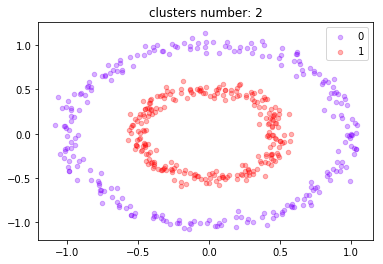

In [24]:
plot_hierarchical(data, clusters_bank[-2])

## project data

In [27]:
data, labels = mylib.get_data("../data/cho.txt")
data = mylib.pca(data)
clusters_bank = init_clusters_bank(data)
distance_matrix = init_distance_matrix(clusters_bank, euclidean_distance)
while(len(distance_matrix) != 0):
    print(len(distance_matrix))
    min_set = get_min_set(distance_matrix)
    overlap_dict = get_overlap_dict(distance_matrix, min_set)
    distance_matrix = update_distance_matrix(distance_matrix, overlap_dict, min_set)
    clusters_bank = update_clusters_bank(clusters_bank, distance_matrix)

In [30]:
data, labels = mylib.get_data("../data/iyer.txt")
data = mylib.pca(data)
clusters_bank = init_clusters_bank(data)
distance_matrix = init_distance_matrix(clusters_bank, euclidean_distance)
while(len(distance_matrix) != 0):
    print(len(distance_matrix))
    min_set = get_min_set(distance_matrix)
    overlap_dict = get_overlap_dict(distance_matrix, min_set)
    distance_matrix = update_distance_matrix(distance_matrix, overlap_dict, min_set)
    clusters_bank = update_clusters_bank(clusters_bank, distance_matrix)

133386
132870
132355
131841
131328
130816
130305
129795
129286
128778
128271
127765
127260
126756
126253
125751
125250
124750
124251
123753
123256
122760
122265
121771
121278
120786
120295
119805
119316
118828
118341
117855
117370
116886
116403
115921
115440
114960
114481
114003
113526
113050
112575
112101
111628
111156
110685
110215
109746
109278
108811
108345
107880
107416
106953
106491
106030
105570
105111
104653
104196
103740
103285
102831
102378
101926
101475
101025
100576
100128
99681
99235
98790
98346
97903
97461
97020
96580
96141
95703
95266
94830
94395
93961
93528
93096
92665
92235
91806
91378
90951
90525
90100
89676
89253
88831
88410
87990
87571
87153
86736
86320
85905
85491
85078
84666
84255
83845
83436
83028
82621
82215
81810
81406
81003
80601
80200
79800
79401
79003
78606
78210
77815
77421
77028
76636
76245
75855
75466
75078
74691
74305
73920
73536
73153
72771
72390
72010
71631
71253
70876
70500
70125
69751
69378
69006
68635
68265
67896
67528
67161
66795
66430
66066
65703


In [32]:
clusters_bank[-2]

{frozenset({1,
            2,
            3,
            4,
            5,
            6,
            7,
            8,
            9,
            10,
            11,
            12,
            13,
            14,
            15,
            16,
            17,
            18,
            19,
            20,
            21,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33,
            34,
            35,
            36,
            37,
            38,
            39,
            40,
            41,
            42,
            43,
            44,
            45,
            46,
            47,
            48,
            49,
            50,
            51,
            52,
            53,
            54,
            55,
            56,
            57,
            58,
            59,
            60,
            61,
            62,
            63,
 